In [ ]:
# Load libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from torchviz import make_dot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using Sequential
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network
epochs = 3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

make_dot(output.detach(), params=dict(
    list(
        network.named_parameters()
        )
      )
    ).render(
        "simple_neural_network",
        format="png"
)

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


'simple_neural_network.png'

In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
!cat /etc/*release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.3 LTS"
PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


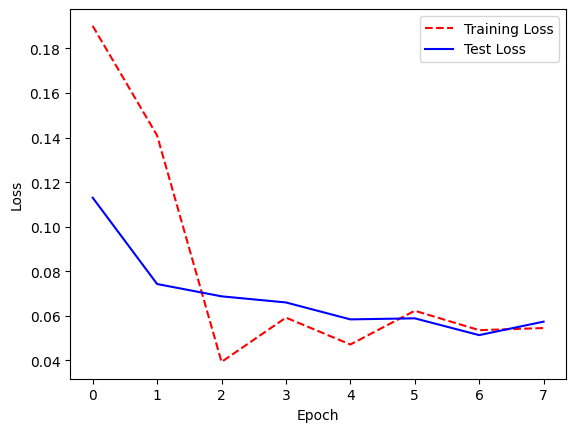

In [ ]:
# Load libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network
epochs = 8
train_losses = []
test_losses = []
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        train_output = network(x_train)
        train_loss = criterion(output, target)
        train_losses.append(train_loss.item())

        test_output = network(x_test)
        test_loss = criterion(test_output, y_test)
        test_losses.append(test_loss.item())

# Visualize loss history
epochs = range(0, epochs)
plt.plot(epochs, train_losses, "r--")
plt.plot(epochs, test_losses, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=1e-4, weight_decay=1e-5)

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network
epochs = 100
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# Evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:",
        test_accuracy.item())

Test Loss: 0.40308892726898193 	Test Accuracy: 0.9599999785423279


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Test Loss: 0.48904040455818176 	Test Accuracy: 0.8500000238418579


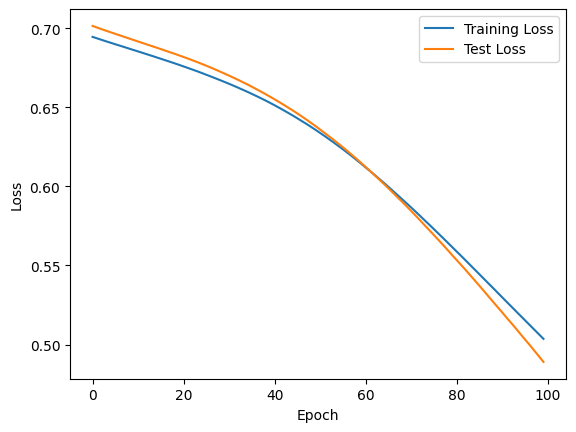

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=1e-4, weight_decay=1e-5)

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network and record losses
epochs = 100
train_losses = []
test_losses = []
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # Record training loss
    with torch.no_grad():
        train_output = network(x_train)
        train_loss = criterion(train_output, y_train)
        train_losses.append(train_loss.item())

        test_output = network(x_test)
        test_loss = criterion(test_output, y_test)
        test_losses.append(test_loss.item())

# Evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:", test_accuracy.item())

# Plot training and test loss
plt.plot(range(epochs), train_losses, label="Training Loss")
plt.plot(range(epochs), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
import lightning as pl
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

class LightningNetwork(pl.LightningModule):
    def __init__(self, network):
        super().__init__()
        self.network = network
        self.criterion = nn.BCELoss()
        self.metric = nn.functional.binary_cross_entropy

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        data, target = batch
        output = self.network(data)
        loss = self.criterion(output, target)
        self.log("val_loss", loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Initialize neural network
network = LightningNetwork(SimpleNeuralNet())

# Train network
trainer = pl.Trainer(callbacks=[EarlyStopping(monitor="val_loss", mode="min",
    patience=3)], max_epochs=1000)
trainer.fit(model=network, train_dataloaders=train_loader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type            | Params
----------------------------------------------
0 | network   | SimpleNeuralNet | 465   
1 | criterion | BCELoss         | 0     
----------------------------------------------
465       Trainable params
0         Non-trainable params
465       Total params
0.002     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type            | Params
----------------------------------------------
0 | network   | Simp

Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Train network
trainer = pl.Trainer(max_epochs=1000)
trainer.fit(model=network, train_dataloaders=train_loader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type            | Params
----------------------------------------------
0 | network   | SimpleNeuralNet | 465   
1 | criterion | BCELoss         | 0     
----------------------------------------------
465       Trainable params
0         Non-trainable params
465       Total params
0.002     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type            | Params
----------------------------------------------
0 | network   | Simp

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1000` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


In [ ]:
# Load libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Dropout(0.1), # Drop 10% of neurons
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network
epochs = 3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Epoch:", epoch+1, "\tLoss:", loss.item())

# Evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:",
        test_accuracy.item())

Epoch: 1 	Loss: 0.20735645294189453
Epoch: 2 	Loss: 0.20834866166114807
Epoch: 3 	Loss: 0.25975286960601807
Test Loss: 0.1384032815694809 	Test Accuracy: 0.8999999761581421


21.12 Saving Model Training Progress

In [ ]:
# Load libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Dropout(0.1), # Drop 10% of neurons
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network
epochs = 5
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        # Save the model at the end of every epoch
        torch.save(
            {
                'epoch': epoch,
                'model_state_dict': network.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss,
            },
            "model.pt"
        )
    print("Epoch:", epoch+1, "\tLoss:", loss.item())

Epoch: 1 	Loss: 0.20735645294189453
Epoch: 2 	Loss: 0.20834866166114807
Epoch: 3 	Loss: 0.25975286960601807
Epoch: 4 	Loss: 0.1492830216884613
Epoch: 5 	Loss: 0.20664513111114502


21.13 Tuning Neural Networks

In [ ]:
# Load libraries
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import RMSprop
from torch.utils.data import random_split, DataLoader, TensorDataset
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self, layer_size_1=10, layer_size_2=10):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, layer_size_1),
            torch.nn.ReLU(),
            torch.nn.Linear(layer_size_1, layer_size_2),
            torch.nn.ReLU(),
            torch.nn.Linear(layer_size_2, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

config = {
    "layer_size_1": tune.sample_from(lambda _: 2 ** np.random.randint(2, 9)),
    "layer_size_2": tune.sample_from(lambda _: 2 ** np.random.randint(2, 9)),
    "lr": tune.loguniform(1e-4, 1e-1),
}

scheduler = ASHAScheduler(
    metric="loss",
    mode="min",
    max_t=1000,
    grace_period=1,
    reduction_factor=2
)

reporter = CLIReporter(
    parameter_columns=["layer_size_1", "layer_size_2", "lr"],
    metric_columns=["loss"]
)

# # Train neural network
def train_model(config, epochs=3):
    network = SimpleNeuralNet(config["layer_size_1"], config["layer_size_2"])

    criterion = nn.BCELoss()
    optimizer = optim.SGD(network.parameters(), lr=config["lr"], momentum=0.9)

    train_data = TensorDataset(x_train, y_train)
    train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

    # Compile the model using torch 2.0's optimizer
    network = torch.compile(network)

    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = network(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            tune.report(loss=(loss.item()))

result = tune.run(
    train_model,
    resources_per_trial={"cpu": 2},
    config=config,
    num_samples=1,
    scheduler=scheduler,
    progress_reporter=reporter
)

best_trial = result.get_best_trial("loss", "min", "last")
print("Best trial config: {}".format(best_trial.config))
print("Best trial final validation loss: {}".format(
    best_trial.last_result["loss"]))

best_trained_model = SimpleNeuralNet(best_trial.config["layer_size_1"],
    best_trial.config["layer_size_2"])

2024-06-02 10:38:23,245	WARNING tune.py:900 -- AIR_VERBOSITY is set, ignoring passed-in ProgressReporter for now.


+--------------------------------------------------------------------+
| Configuration for experiment     train_model_2024-06-02_10-38-23   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        AsyncHyperBandScheduler           |
| Number of trials                 1                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_model_2024-06-02_10-38-23
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-06-02_10-12-32_017645_279/artifacts/2024-06-02_10-38-23/train_model_2024-06-02_10-38-23/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-06-02 10:38:23. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-------------------------------------------------+
| Trial name                status             

(train_model pid=21200) No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
2024-06-02 10:38:41,677	ERROR tune_controller.py:1331 -- Trial task failed for trial train_model_3c82f_00000
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2623, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 861, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(Att


Trial train_model_3c82f_00000 errored after 0 iterations at 2024-06-02 10:38:41. Total running time: 18s
Error file: /tmp/ray/session_2024-06-02_10-12-32_017645_279/artifacts/2024-06-02_10-38-23/train_model_2024-06-02_10-38-23/driver_artifacts/train_model_3c82f_00000_0_lr=0.0044_2024-06-02_10-38-23/error.txt

Trial status: 1 ERROR
Current time: 2024-06-02 10:38:41. Total running time: 18s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+-------------------------------------------------+
| Trial name                status             lr |
+-------------------------------------------------+
| train_model_3c82f_00000   ERROR      0.00443038 |
+-------------------------------------------------+

Number of errored trials: 1
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                  # fai

TuneError: ('Trials did not complete', [train_model_3c82f_00000])

In [ ]:
# Import libraries
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import RMSprop
from torch.utils.data import random_split, DataLoader, TensorDataset
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from ray.air import session  # Import the session module for reporting

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self, layer_size_1=10, layer_size_2=10):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, layer_size_1),
            torch.nn.ReLU(),
            torch.nn.Linear(layer_size_1, layer_size_2),
            torch.nn.ReLU(),
            torch.nn.Linear(layer_size_2, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

config = {
    "layer_size_1": tune.sample_from(lambda _: 2 ** np.random.randint(2, 9)),
    "layer_size_2": tune.sample_from(lambda _: 2 ** np.random.randint(2, 9)),
    "lr": tune.loguniform(1e-4, 1e-1),
}

scheduler = ASHAScheduler(
    metric="loss",
    mode="min",
    max_t=1000,
    grace_period=1,
    reduction_factor=2
)

reporter = CLIReporter(
    parameter_columns=["layer_size_1", "layer_size_2", "lr"],
    metric_columns=["loss"]
)

# # Train neural network
def train_model(config, epochs=3):
    network = SimpleNeuralNet(config["layer_size_1"], config["layer_size_2"])

    criterion = nn.BCELoss()
    optimizer = optim.SGD(network.parameters(), lr=config["lr"], momentum=0.9)

    train_data = TensorDataset(x_train, y_train)
    train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

    # Compile the model using torch 2.0's optimizer
    network = torch.compile(network)

    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = network(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            session.report({"loss": loss.item()})

result = tune.run(
    train_model,
    resources_per_trial={"cpu": 2},
    config=config,
    num_samples=1,
    scheduler=scheduler,
    progress_reporter=reporter
)

best_trial = result.get_best_trial("loss", "min", "last")
print("Best trial config: {}".format(best_trial.config))
print("Best trial final validation loss: {}".format(
    best_trial.last_result["loss"]))

best_trained_model = SimpleNeuralNet(best_trial.config["layer_size_1"],
    best_trial.config["layer_size_2"])


2024-06-02 10:40:49,059	WARNING tune.py:900 -- AIR_VERBOSITY is set, ignoring passed-in ProgressReporter for now.


+--------------------------------------------------------------------+
| Configuration for experiment     train_model_2024-06-02_10-40-49   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        AsyncHyperBandScheduler           |
| Number of trials                 1                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_model_2024-06-02_10-40-49
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-06-02_10-12-32_017645_279/artifacts/2024-06-02_10-40-49/train_model_2024-06-02_10-40-49/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-06-02 10:40:49. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-------------------------------------------------+
| Trial name                status             

(train_model pid=21869) No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'



Trial train_model_936ba_00000 finished iteration 1 at 2024-06-02 10:41:10. Total running time: 21s
+--------------------------------------------------+
| Trial train_model_936ba_00000 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         11.3874 |
| time_total_s                             11.3874 |
| training_iteration                             1 |
| loss                                     0.69468 |
+--------------------------------------------------+

Trial train_model_936ba_00000 finished iteration 2 at 2024-06-02 10:41:10. Total running time: 21s
+--------------------------------------------------+
| Trial train_model_936ba_00000 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         0.00583 |
| time_total_s                             11.3933 |
| tra

2024-06-02 10:41:10,557	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-06-02 10:41:10,561	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_model_2024-06-02_10-40-49' in 0.0095s.



Trial train_model_936ba_00000 finished iteration 19 at 2024-06-02 10:41:10. Total running time: 21s
+--------------------------------------------------+
| Trial train_model_936ba_00000 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         0.00393 |
| time_total_s                             11.4624 |
| training_iteration                            19 |
| loss                                     0.64353 |
+--------------------------------------------------+

Trial train_model_936ba_00000 finished iteration 20 at 2024-06-02 10:41:10. Total running time: 21s
+--------------------------------------------------+
| Trial train_model_936ba_00000 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         0.00419 |
| time_total_s                             11.4665 |
| t

In [ ]:
!cat /tmp/ray/session_2024-06-02_10-12-32_017645_279/artifacts/2024-06-02_10-12-44/train_model_2024-06-02_10-12-44/driver_artifacts/train_model_a713b_00000_0_lr=0.0044_2024-06-02_10-12-45/error.txt


Failure # 1 (occurred at 2024-06-02_10-36-30)
ray::ImplicitFunc.train() (pid=20583, ip=172.28.0.12, actor_id=97fde5bf2b7068985ba52ac201000000, repr=train_model)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 331, in train
    raise skipped from exception_cause(skipped)
  File "/usr/local/lib/python3.10/dist-packages/ray/air/_internal/util.py", line 98, in run
    self._ret = self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/function_trainable.py", line 45, in <lambda>
    training_func=lambda: self._trainable_func(self.config),
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/function_trainable.py", line 248, in _trainable_func
    output = fn()
  File "<ipython-input-6-f33ce8bba7b8>", line 89, in train_model
AttributeError: module 'ray.tune' has no attribute 'report'


In [ ]:
# Load libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from torchviz import make_dot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
    n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using Sequential
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network
epochs = 3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

make_dot(output.detach(), params=dict(
    list(network.named_parameters()
        )
      )
    ).render(
        "simple_neural_network",
        format="png"
)

'simple_neural_network.png'

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

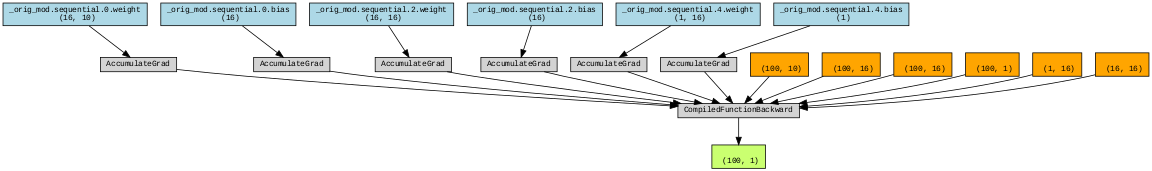

In [ ]:
from IPython.display import Image
Image('simple_neural_network.png')

In [ ]:
# Load libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from torchviz import make_dot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using Sequential
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

# Train neural network
epochs = 3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# Visualize the network architecture
output = network(x_test)  # Forward pass to get the output
make_dot(output, params=dict(network.named_parameters())).render("simple_neural_network", format="png")


'simple_neural_network.png'

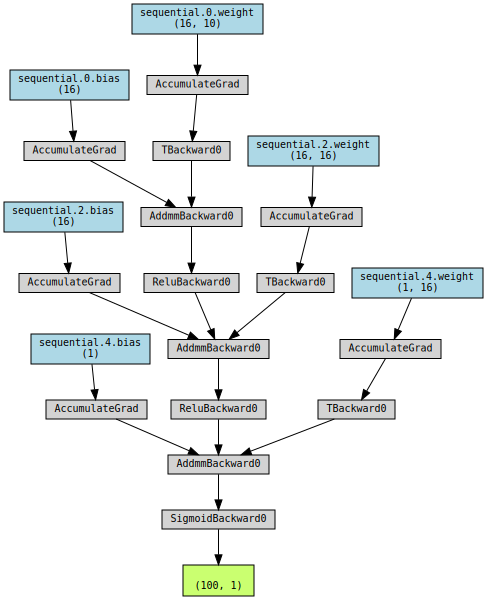

In [ ]:
import torch
import torch.nn as nn
from torchviz import make_dot

# 定義一個簡單的神經網絡
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# 初始化神經網絡
network = SimpleNet()

# 定義一個測試用的輸入
x = torch.randn(100, 10)

# 執行前向傳播計算
output = network(x)

# 構建計算圖並可視化
make_dot(output, params=dict(network.named_parameters()))


In [ ]:
cat /etc/*-release


DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.3 LTS"
PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# 檢查是否有可用的GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

# 加載Olivetti faces數據集
data = fetch_olivetti_faces()
X, y = data.data, data.target

# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 將數據轉換為PyTorch Tensor
X_train = torch.from_numpy(X_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_train = torch.from_numpy(y_train).long().to(device)
y_test = torch.from_numpy(y_test).long().to(device)

# 創建PyTorch DataLoader
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# 定義神經網絡
class OlivettiClassifier(nn.Module):
    def __init__(self):
        super(OlivettiClassifier, self).__init__()
        self.fc1 = nn.Linear(4096, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 40)
        self.to(device)  # 將模型移動到GPU

    def forward(self, x):
        x = x.view(-1, 4096)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 創建模型實例
model = OlivettiClassifier()

# 定義損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
epochs = 10
losses = []  # 用於存儲每個epoch的損失值
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1}, loss: {epoch_loss:.4f}')

# 在測試集上評估模型
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

# 繪製損失曲線
plt.figure()
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

Using cpu device
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


HTTPError: HTTP Error 403: Forbidden

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.datasets import fetch_olivetti_faces
ofaces = fetch_olivetti_faces()
print(ofaces.DESCR)

<ipython-input-7-c8c28602b455>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


HTTPError: HTTP Error 403: Forbidden